<a href="https://colab.research.google.com/github/radhikachoudhary64/AIML_gittraining/blob/master/Netflix_Insights_%26_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Problem Statement](#updateTitle=true&folderId=16_CR80sBnoPWV_8H0lmyn2Zj4XqOBq08&scrollTo=71P15JI8ykMj)

>[Analysing Basic Metrics](#updateTitle=true&folderId=16_CR80sBnoPWV_8H0lmyn2Zj4XqOBq08&scrollTo=mkHr_Uak0ZD3)

>[Non Graphical Analysis](#updateTitle=true&folderId=16_CR80sBnoPWV_8H0lmyn2Zj4XqOBq08&scrollTo=d5zx1aCzluM8)

>[Visual Analysis](#updateTitle=true&folderId=16_CR80sBnoPWV_8H0lmyn2Zj4XqOBq08&scrollTo=KnrFF82lmLu0)

>[Recommendation](#updateTitle=true&folderId=16_CR80sBnoPWV_8H0lmyn2Zj4XqOBq08&scrollTo=pI_WgEwl7Y9Z)



# Problem Statement 


Q1)Which Type of Show to Produce

Q2)How to grow business 

Q3)Type of Content available in diff country

Q4)1)How has the number of movies released per year changed over the last 20-30 years?

2)Comparison of tv shows vs. movies.

3)What is the best time to launch a TV show?

4)Analysis of actors/directors of different types of shows/movies.

5)Does Netflix has more focus on TV Shows than movies in recent years

6)Understanding what content is available in different countries

In [68]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 4.82MB/s]


In [69]:
import pandas as pd

In [70]:
movies = pd.read_csv('netflix.csv')

In [71]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Analysing Basic Metrics

In [72]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Observation**

**Shape of Data** = 8807 X 12 (8807 rows(data records) , 12 Columns (Categories)

**Data Types** = object,int64

**Missing Value Detection** = director,cast,country,date_added,duration,ratings has few missing values



In [73]:
 movies.dropna(inplace=True) 

In [74]:
movies.describe() #statistical Summary

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [75]:
movies["director"].value_counts() #Value counts and unique values (There are 3945 directors but in this few recors directors names are clubbed together )

Raúl Campos, Jan Suter           18
Marcus Raboy                     15
Jay Karas                        14
Cathy Garcia-Molina              13
Martin Scorsese                  12
                                 ..
Igor Kovalyov, Norton Virgien     1
Danny Cannon                      1
Mana Yasuda                       1
Gupse Özay                        1
Mozez Singh                       1
Name: director, Length: 3945, dtype: int64

In [76]:
movies["type"].value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

In [77]:
movies["country"].value_counts()   #There are 604 unique country but in few recors countries are clubbed 

United States                                   1846
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: country, Length: 604, dtype: int64

In [78]:
movies["release_year"].value_counts() #Data contains 72 uniques years records

2017    657
2018    648
2016    577
2019    519
2020    442
       ... 
1946      1
1961      1
1942      1
1947      1
1944      1
Name: release_year, Length: 72, dtype: int64

In [79]:
movies["rating"].value_counts() #Different types of rating with their respective count 

TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

In [80]:
movies["duration"].value_counts() #Different duration of movies/tvshow , 94 min has the highest number of movies/shows

94 min     135
93 min     130
97 min     129
95 min     127
90 min     123
          ... 
189 min      1
229 min      1
237 min      1
214 min      1
191 min      1
Name: duration, Length: 198, dtype: int64

In [81]:
#Unnesting
movies["cast"]= movies["cast"].apply(lambda x : str(x).replace(", ",",").split(","))
movies["listed_in"]= movies["listed_in"].apply(lambda x : str(x).replace(", ",",").split(","))
movies["director"]= movies["director"].apply(lambda x : str(x).replace(", ",",").split(","))
movies["country"]= movies["country"].apply(lambda x : str(x).replace(", ",",").split(","))

In [82]:
movies_unest=movies.explode("cast")
movies_unest=movies_unest.explode("listed_in")
movies_unest=movies_unest.explode("director")
movies_unest=movies_unest.explode("country")

In [84]:
movies_unest.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Germany,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."


# Non Graphical Analysis

In [85]:
movies_unest.info() #After handling missing values and ennesting the data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143163 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       143163 non-null  object
 1   type          143163 non-null  object
 2   title         143163 non-null  object
 3   director      143163 non-null  object
 4   cast          143163 non-null  object
 5   country       143163 non-null  object
 6   date_added    143163 non-null  object
 7   release_year  143163 non-null  int64 
 8   rating        143163 non-null  object
 9   duration      143163 non-null  object
 10  listed_in     143163 non-null  object
 11  description   143163 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.2+ MB


In [86]:
movies_unest.describe()

,release_year
count,143163.000000
mean,2012.159559
std,9.706216
min,1942.000000
25%,2010.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [87]:
movies_unest["director"].value_counts() #There are 4311 unique directors

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Leanne Gater             1
Jedd Wider               1
Mario Briongos           1
Joana Mazzucchelli       1
Michelle Caputo          1
Name: director, Length: 4311, dtype: int64

In [111]:
movies_unest["listed_in"].nunique() # There are 42 types of listed_in categories

42

In [113]:
movies_unest["listed_in"].value_counts() #Different types of categories and their repective counts

Dramas                          28722
International Movies            26222
Comedies                        19834
Action & Adventure              11761
Independent Movies               9712
Children & Family Movies         8796
Thrillers                        6857
Romantic Movies                  6145
Horror Movies                    4416
Sci-Fi & Fantasy                 3980
Music & Musicals                 2717
Documentaries                    1492
International TV Shows           1450
Classic Movies                   1416
Sports Movies                    1389
Cult Movies                      1071
TV Dramas                        1023
Anime Features                    934
LGBTQ Movies                      769
Faith & Spirituality              699
Crime TV Shows                    547
Stand-Up Comedy                   443
TV Action & Adventure             308
TV Shows                          286
TV Comedies                       265
Kids' TV                          236
Romantic TV 

In [89]:
movies_unest["country"].value_counts()

United States     45770
India             21762
United Kingdom     9010
France             6816
Canada             5793
                  ...  
Vatican City          3
Sri Lanka             2
Afghanistan           2
Panama                2
Nicaragua             1
Name: country, Length: 110, dtype: int64

In [90]:
movies_unest["cast"].value_counts()

Liam Neeson         161
Alfred Molina       154
John Krasinski      138
Salma Hayek         130
Frank Langella      128
                   ... 
Zach Avery            1
Jesse LaTourette      1
Aubrey Cleland        1
Bukky Bakray          1
Bishop Stevens        1
Name: cast, Length: 25458, dtype: int64

# Visual Analysis

<Figure size 7200x5040 with 0 Axes>

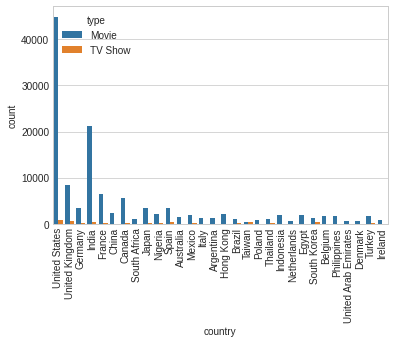

<Figure size 7200x5040 with 0 Axes>

In [110]:
#Type of Content available in different country
import matplotlib.pyplot as plt
import seaborn as sns
top30_country = movies_unest["country"].value_counts().index[:30]
type_content = movies_unest['type'].value_counts().index[:2]
top30_data = movies_unest.loc[(movies_unest["country"].isin(top30_country)) & (movies_unest["type"].isin(type_content))]
sns.countplot(x="country", data=top30_data, hue="type")
plt.xticks(rotation = 90)
plt.figure(figsize=(100,70))

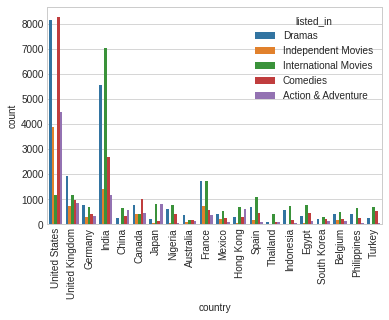

<Figure size 7200x5400 with 0 Axes>

In [92]:
#Understanding what content is available in different countries
top20_country = movies_unest["country"].value_counts().index[:20]
type_listedin = movies_unest['listed_in'].value_counts().index[:5]
top20_data = movies_unest.loc[(movies_unest["country"].isin(top20_country)) & (movies_unest["listed_in"].isin(type_listedin))]
sns.countplot(x="country", data=top20_data, hue="listed_in")
plt.xticks(rotation = 90)
plt.figure(figsize=(100,75))
plt.show()

In [93]:
#How has the number of movies released per year changed over the last 20-30 years?
last30_years = movies_unest[(movies_unest["type"]=="Movie") &  (movies_unest["release_year"]>1990)]


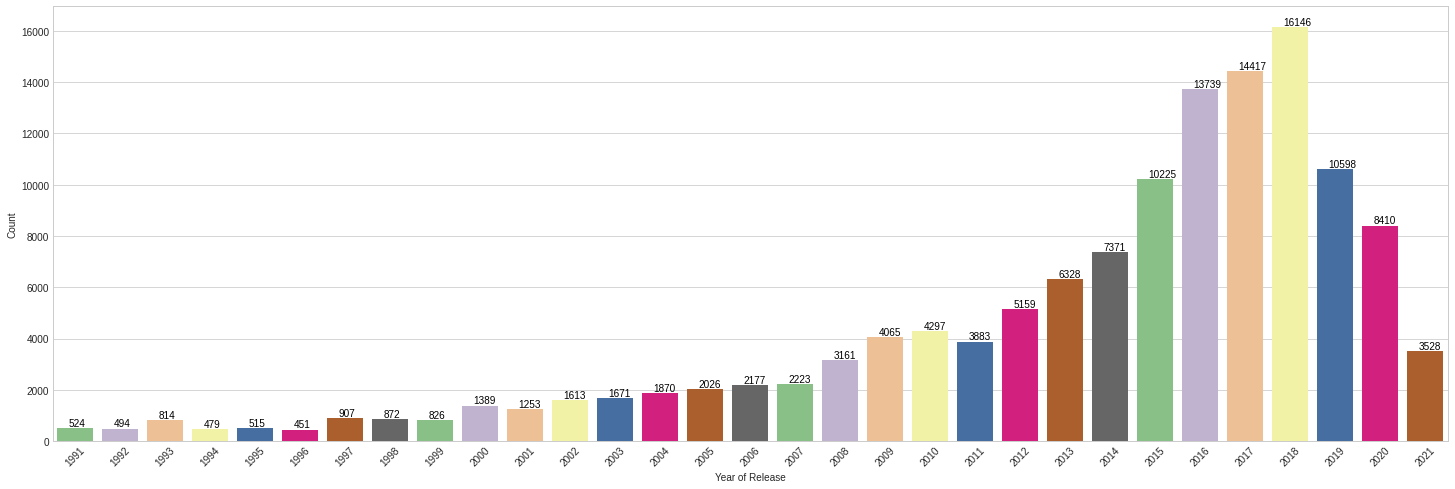

In [94]:
plt.figure(figsize = (25, 8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'release_year', data = last30_years, palette = "Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

<Figure size 1440x2160 with 0 Axes>

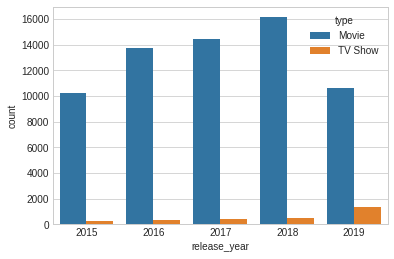

<Figure size 1440x2160 with 0 Axes>

In [95]:
#Does Netflix has more focus on TV Shows than movies in recent years
last5_years = movies_unest['release_year'].value_counts().index[:5]
top5_data = movies_unest.loc[(movies_unest["release_year"].isin(last5_years))]
sns.countplot(x="release_year", data=top5_data, hue="type")
plt.figure(figsize=(20,30))

**Yes,From 2018-2019 Movie count has reduced and TV shows count has increased**


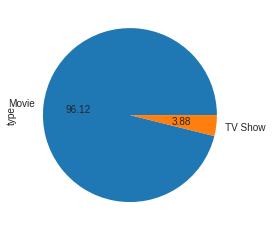

In [96]:
#Comparison of tv shows vs. movies
movies_unest["type"].value_counts().plot(kind = "pie", autopct = "%.2f")

In [97]:
#What is the best time to launch a TV show?
movies_unest["date_added"] = pd.to_datetime(movies_unest['date_added'])
movies_unest['day_added'] = movies_unest['date_added'].dt.day
movies_unest['year_added'] = movies_unest['date_added'].dt.year
movies_unest['month_added']=movies_unest['date_added'].dt.month
movies_unest['year_added'].astype(int);
movies_unest['day_added'].astype(int);

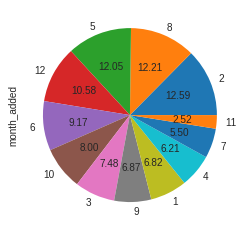

In [98]:
tv_show=movies_unest[movies_unest['type']=="TV Show"]
tv_show["month_added"].value_counts().plot(kind = "pie", autopct = "%.2f")

**Recommendation**
According to the pie chart,In February highest number of TV Shows were added , so february is the best time to launch a TV show


In [99]:
#Analysis of actors/directors of different types of shows/movies.


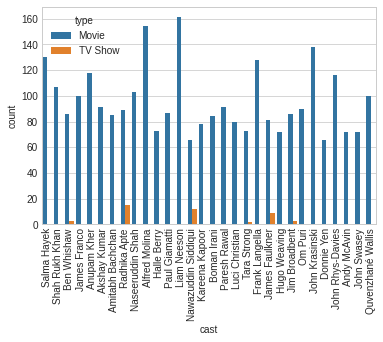

<Figure size 14400x5400 with 0 Axes>

In [100]:
top30_cast = movies_unest["cast"].value_counts().index[:30]
type_show = movies_unest['type'].value_counts().index[:2]
top30_data = movies_unest.loc[(movies_unest["cast"].isin(top30_cast)) & (movies_unest["type"].isin(type_show))]
sns.countplot(x="cast", data=top30_data, hue="type")
plt.xticks(rotation = 90)
plt.figure(figsize=(200,75))
plt.show()

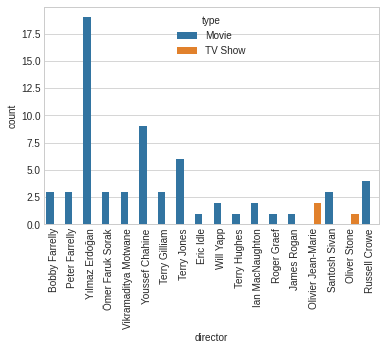

<Figure size 14400x5400 with 0 Axes>

In [101]:
top30_directors = movies_unest["director"].value_counts().index[:30]
type_show = movies_unest['type'].value_counts().index[:2]
top30_data = movies_unest.loc[(movies_unest["cast"].isin(top30_directors)) & (movies_unest["type"].isin(type_show))]
sns.countplot(x="director", data=top30_data, hue="type")
plt.xticks(rotation = 90)
plt.figure(figsize=(200,75))
plt.show()

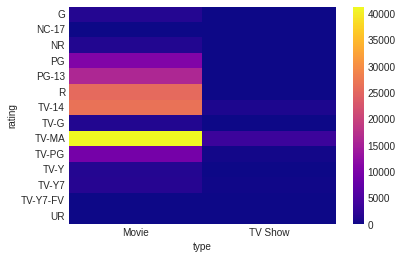

In [102]:
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(movies_unest["rating"], movies_unest["type"]), cmap = colormap)

In [104]:
print(movies_unest["description"])

7       On a photo shoot in Ghana, an American model s...
7       On a photo shoot in Ghana, an American model s...
7       On a photo shoot in Ghana, an American model s...
7       On a photo shoot in Ghana, an American model s...
7       On a photo shoot in Ghana, an American model s...
                              ...                        
8806    A scrappy but poor boy worms his way into a ty...
8806    A scrappy but poor boy worms his way into a ty...
8806    A scrappy but poor boy worms his way into a ty...
8806    A scrappy but poor boy worms his way into a ty...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 143163, dtype: object


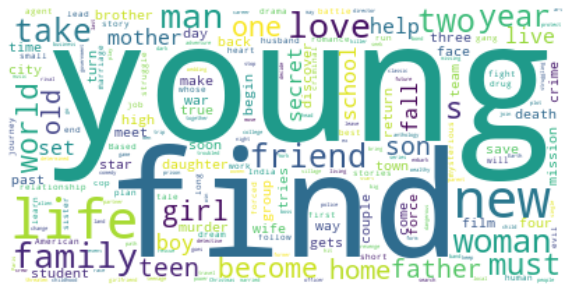

In [105]:
from wordcloud import WordCloud 
text = " ".join(description for description in movies_unest.description)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Description with words such as young,find,friend,family,love ec are more popular movies/show

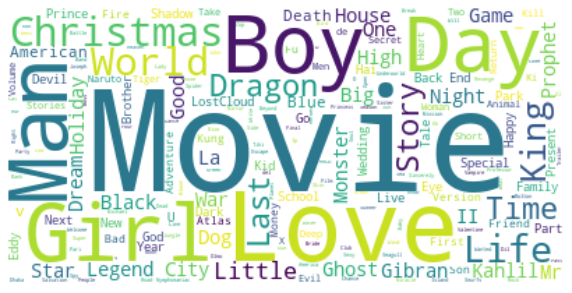

In [106]:
text = " ".join(title for title in movies_unest.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Most title contains words such as Movie,Boy,Day,Girl,Love,Man etc as shown in above fig

# Recommendation

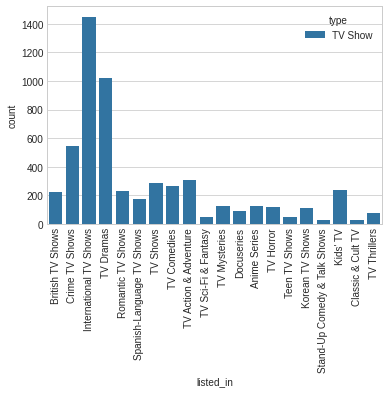

<Figure size 7200x5400 with 0 Axes>

In [123]:
#Q1)Which Type of Show to Produce
tv_show = movies_unest[movies_unest["type"]=="TV Show"]
type_listedin = tv_show['listed_in'].value_counts().index[:20]
top20_data = tv_show.loc[tv_show["listed_in"].isin(type_listedin)]
sns.countplot(x="listed_in", data=top20_data, hue="type")
plt.xticks(rotation = 90)
plt.figure(figsize=(100,75))
plt.show()

According to the figure International TV,Crime TV and TV Dramas show has the highest number of demands , hence these kinds of shows should be produced

In [ ]:
#Q2)How to grow business 

#To retain existing customer by meeting their demands and to follow up the latest trend 
"""According to above various analysis there are more number of movies as compared to TV show
By making the top rated shows such as TV-MA,TV-14, R and by famous directors Martin Scorsese,Youssef Chahine,Cathy and cast such as Liam Neeson         161
Alfred Molina   """
